## Decision Trees
### Agenda
1. Introduction to Decision Trees
2. Algorithm : Decision Trees
3. Decision Tree for Classification
4. Decision Tree for Regression
5. Advantages & Limitations of Decision Trees



### 1. Introduction to Decision Trees

- Its a tree like data structure to make a model of the data
- uses if-else at every node of the tree
- can be used for both classification and regression analysis  

Terminology:  
Root Node: It represents entire population or sample and this further gets divided into two or more homogeneous sets.  

Splitting: Process of dividing a node into two or more sub-nodes.

Pruning: Why?
The splitting process results in fully grown trees until the stopping criteria are reached. But, the fully grown tree is likely to overfit the data, leading to poor accuracy on unseen data.

    Remove the decision nodes starting from leaf such that overall accuracy is not disturbed.
    training set split into training dataset -> D and validation dataset -> V
    Create decision tree using training dataset D
    continue trimming the tree to optimize the accuracy of the Validation dataset -> V

 



# 2. Algorithm : Decision Trees

1. ID3 (Entropy and Information Gain)
2. Gini Index
3. Chi Square
4. Reduction in Variance

### ID3 (Entropy and Information Gain)

* Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* Objective of CART is to maximize information gain in each split

## Entropy

- A decision tree involves partitioning the data into subsets that contain instances with similar values (homogeneous). 
- Homogeneity of a Sample is calcualted by ID3 algorithm using entropy. 
- Entropy Zero(Min) - Sample is completely homogeneous 
- Entropy One(Max) - Sample is equally divided 


<img src="Image/entropy.JPG" width="300" />

$ Entropy(max) = - 0.5log_20.5 - 0.5log_20.5 = 1 $  
$ Entropy(min) = - 0log_20 - 1log_21 = 0 $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
play_data = pd.read_csv('Data/Classification/tennis.csv')

In [3]:
play_data

outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no

* A decision tree for above data

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">


### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [5]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [19]:
Entropy_Play =  -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

In [18]:
Entropy_Play

0.9402859586706311

In [12]:
play_data[play_data.outlook == 'sunny']

outlook  temp humidity  windy play
0    sunny   hot     high  False   no
1    sunny   hot     high   True   no
7    sunny  mild     high  False   no
8    sunny  cool   normal  False  yes
10   sunny  mild   normal   True  yes

In [13]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [14]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

In [15]:
play_data[play_data.outlook == 'overcast']

outlook  temp humidity  windy play
2   overcast   hot     high  False  yes
6   overcast  cool   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes

In [16]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0

In [17]:
play_data[play_data.outlook == 'rainy']

outlook  temp humidity  windy play
3    rainy  mild     high  False  yes
4    rainy  cool   normal  False  yes
5    rainy  cool   normal   True   no
9    rainy  mild   normal  False  yes
13   rainy  mild     high   True   no

In [18]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

In [19]:
Entropy_Play_Outlook_Rain

0.9709505944546686

### Information Gain
- The information gain is based on the decrease in entropy after a dataset is split on an attribute. 
- Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
$ Gain(A, B) = Entropy(A) – Entropy(A,B) $
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook


<img src="Image/entropy1.JPG" width="300" />

#### Gain on splitting by attribute outlook

$Entropy(Play,Outlook) = P(Sunny).Entropy(Play,Outlook=Sunny) + P(Overcast).Entropy(Play,Outlook=Overcast) + P(Rainy).Entropy(Play,Outlook=rainy)$  
                                                                
$Entropy(Play,Outlook) = P(Sunny).E(3,2) + P(Overcast).E(4,0) + P(Rainy).E(2,3)  $  
  
$ Entropy(Play,Outlook) = (\frac{5}{14})*0.971 + (\frac{4}{14})*0 + (\frac{5}{14})*0.971 = 0.693 $  
  
$Gain(Play,Outlook) = Entropy(Play) - Entropy(Play,Outlook) $  
  
$Gain(Play,Outlook) = 0.94 - 0.693 = 0.247 $

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria

In [21]:
play_data[play_data.outlook == 'overcast']

outlook  temp humidity  windy play
2   overcast   hot     high  False  yes
6   overcast  cool   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes

##### Conclusion - If outlook is overcast, play is true

### Algorithm is run recursively on the non-leaf branches

In [22]:
play_data[play_data.outlook == 'sunny']

outlook  temp humidity  windy play
0    sunny   hot     high  False   no
1    sunny   hot     high   True   no
7    sunny  mild     high  False   no
8    sunny  cool   normal  False  yes
10   sunny  mild   normal   True  yes

### 3. Decision Tree for Classification
* The leaf nodes of decision tree decides the class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

1.0
1.0


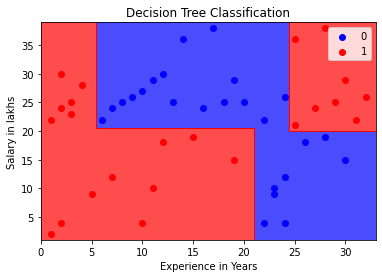

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import dataset
dataset = pd.read_csv('Data/Classification/Apply_Job.csv')

X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# building our decision tree classifier and fitting the model
from sklearn.tree import DecisionTreeClassifier
dt_c = DecisionTreeClassifier()
dt_c.fit(X_train, y_train)


from sklearn.metrics import accuracy_score

pred_train = dt_c.predict(X_train)
pred_test = dt_c.predict(X_test)

train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

print(train_accuracy)
print(test_accuracy)


# Visualising the Training set results
from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = dt_c
h = 0.01
X_plot, z_plot = X, y 

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('blue', 'red')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['blue', 'red'][i], cmap = ListedColormap(('blue', 'red')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Tree Classification')
plt.xlabel('Experience in Years')
plt.ylabel('Salary in lakhs')
plt.legend()

plt.show()

#### Decision Tree on iris dataset

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42, shuffle = True)

In [28]:
# building our decision tree classifier and fitting the model
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
# predicting on the train and the test data and assessing the accuracies
from sklearn.metrics import accuracy_score

pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
print('Training accuracy is: {0}'.format(train_accuracy))
print('Testing accuracy is: {0}'.format(test_accuracy))

Training accuracy is: 1.0
Testing accuracy is: 0.98


In [31]:
export_graphviz(dt,'dt.tree')

### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt6.PNG?raw=true">

In [33]:
dt.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

#### Feature Importances
* Important features will be higher up the tree
* We can use this techniques to identify important features

In [50]:
dt.feature_importances_

array([0.01829811, 0.01553389, 0.32574341, 0.64042459])

#### Visualizing Decision Decision Boundry

In [51]:
from sklearn.datasets import make_blobs

In [52]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

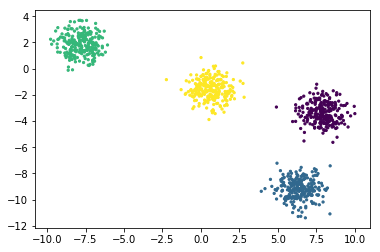

In [53]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [57]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [58]:
xx.shape

(86, 109)

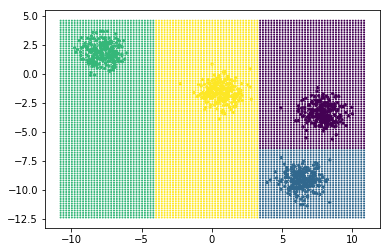

In [59]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

### 4. Decision Tree for Regression
* Continues target is predicted with Tree.
* ID3 is modified for regression by replacing Information Gain with Mean Squared Error.
* Decision Tree tries to partition data into subsets of homogenous contents ( minimize mean squared error )

Text(0.5, 0, 'Years of Exp.')

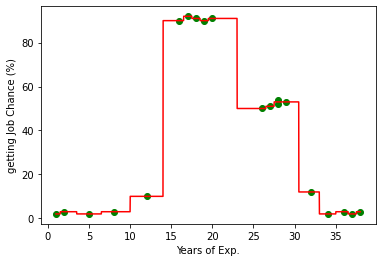

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/Regression/Job_Exp.csv')
X = dataset.iloc[:, [0]].values
y = dataset.iloc[:, 1].values

# Applying the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_r = DecisionTreeRegressor(random_state = 0)
dt_r.fit(X, y)

# Predicting a new result
y_pred = dt_r.predict([[27]])

# Visualising
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, dt_r.predict(X_grid), color = 'red')
plt.ylabel('getting Job Chance (%)')
plt.xlabel('Years of Exp.')

### 5. Advantages of Decision Tree
* Highly Interpretable & can be visualized
* Minimal data preprocessing - missing data handling, normalizing, one-hot-encoding not required
* Handle both numerical & categorical values
* Supports multi-output 

### 6. Limitations of Decision Tree
* Overfitting - height of tree kept growing with addition of more data
* Slight changes in data or order of data can change the tree


##### The above limitations can be handled by Pruning

#### Pruning
* A technique of machine learning which reduces height of the tree by chopping off parts of the tree that's not doing anything significant in prediction  

- Remove the decision nodes starting from leaf such that overall accuracy is not disturbed.
- training set split into training dataset -> D and validation dataset -> V
- Create decision tree using training dataset D
- continue trimming the tree to optimize the accuracy of the Validation dataset -> V

* Pruning is not currently supported in scikit

# Question and Answers

**Ques:** State circumstances under which it is better to split into 3 groups ?  
**Ans:** It is never necessary to do more than one split at a level because you can split them again in next level.  
  
  
**Ques:** When not to use DecisionTree?  
**Ans:** Decision tree or tree based models in general are unable to extrapolate to any kind of data they haven’t seen before, particularly future time period as they tend to averaging data points they have already seen. In this neural net or linear regression model are preferred choice. So, DT is used mostly in classification problem. They are used in Regression problem if and only if target value is inside the range of values they are trained on.  
  
  
**Ques:** Whats the disadvantage of Decision Tree?  
**Ans:** DT are prone to overfitting. Thats why Random Forest and XGBoost are preferred.  



# Advantages and Disadvantages of Decision Tree
**Adv**  
1. Can be used for both Classification and Regression Problem
2. Less data preparation required - not influenced by outliers and missing values upto some extent
3. Data type not constraint - can handle both numerical and categorical variables
4. Easy to understand, interpret and visualize
5. Can capture non linear relationship  
**DisAdv**
1. Overfitting
2. Not fit for continuous variables - with continuous numerical values, DT looses information when it categorizes variables in different categories
3. Cannot extrapolate
4. Unstable - small variation can lead to significant change in tree - Variance. Bagging and Boosting is used to lower variance.